<a href="https://colab.research.google.com/github/iliyanalibhai/CS105-Data-Analysis-Methods/blob/main/CS105FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Proposal - Classification**
A topic that interests us is the classification of wildlife species from the KTH-Animals and Labeled Information Library of Alexandria: Biology and Conservation (LILA) dataset. This topic serves as a practical introduction into the classification of species from images submitted by animal enthusiasts, hikers, or biologists. By investigating the features unique to some species, we learn more about how to employ machine learning methods to automate animal identification. With the techniques learned here, we hope to facilitate the detection of endangered animal species, improve public awareness, help conservation efforts, and guide future projects.

We want to know if it is possible to identify an animal by testing a number of features such as ear shape and size, snout size and shape, fur color, or tail size. We can answer this question by choosing all of our target classes. Then, we train some classification algorithms to recognize features unique to some target classes and cluster images with high ingroup similarity and low outgroup similarity.

##**Data Collection and Cleaning**

Using the LILA and KTH-Animals dataset, we extracted features from labeled images of leopards, coyotes, and zebras. To extract the data, we used HOG(Histogram of Oriented Gradients), mean RGB values, and edge values. The features obtained from our feature selection algorithm become quantitative variables about the characteristics of our animals.


The data is already collected, but we need to limit our dataset size for this project to 100 images. We also need to resize images to the same standard and normalize them before performing any analysis.

##**Learning Models**

We used K Nearest Neighbors to classify our images based on our features and K-means clustering to find natural groupings of data based on their feature values. By using clusters to classify images, we eliminated the need to test multiple values of K which helped in choosing K for KNN. We evaluated the success of our classification algorithm using a confusion matrix focusing on precision, accuracy, and recall.

##**Contributions**

**Adolfo Plata** - Introduction, Proposal, Hypotheses,  KNN models , Feature extractions for Edges, avgRGB, and HOG functions. K-Mean clusters for Edges and HOG.  Also, confusion matrices.

**William Kim** - RGB intensity models for KNN, feature extraction method for RGB flattening, project report descriptions for k-neighbors. Conclusion, confusion graph explanations, report descriptions

**Iliyan Alibhai** - KNN modelling for HOG, Slides and Presentation, report Descriptions,

**Jalen Dioneda** - K-Mean Clusters for both Edges, HOG, and RGB Intensity values. Descriptions and explanations for clusters,

**Jarnett Asuncion** - Slides and Presentation, Report descriptions

In [ ]:
import tarfile
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from cv2 import imread
import cv2
from google.colab.patches import cv2_imshow
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from matplotlib import image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn import manifold, decomposition
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.model_selection import cross_val_score


ac = tarfile.open('10ClassesofAnimals.tar.gz', 'r')
for member in ac.getmembers():
    if ".jpg" in member.name:
        ac.extract(member, "Animal_dir")

print(os.listdir('Animal_dir'))




['animal_database']


# Feature Extraction

##Feature 1: Average RGB Value
To classify images, we first need to extract certain features from the images.

The first feature extraction we picked is grabbing the average RGB values from each image. This simple extraction grabs a single value to represent an image. We start here because it is the most basic and because our animals we classify live in wildly different environments (white snow vs green pastures), this may be a feature to select.

In [ ]:
def extractRGBFunction(pathDir):
  set_stop = 1
  trainSet = []
  for img_name in os.listdir(pathDir):
    if (img_name.endswith(".jpg")):
        img_path = os.path.join(pathDir, img_name)
        img = np.array(mpimg.imread(img_path))
        image_resize = cv2.resize(img, (224, 224))
        coloredimage = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)
        meanRGB = np.average(coloredimage)
        trainSet.append(meanRGB)
    set_stop = set_stop + 1
  return trainSet
extractRGBFunction('Animal_dir/animal_database/zebra/original')
extractRGBFunction('Animal_dir/animal_database/leopard/original')
extractRGBFunction('Animal_dir/animal_database/coyote/original')

[89.8394318664966,
 94.44223666028911,
 98.98301977040816,
 61.9900284332483,
 159.65823634141157,
 44.38875823767007,
 71.32028592687075,
 64.98414248511905,
 57.32059816113946,
 113.85174186862245,
 97.3540271577381,
 84.68575946003402,
 102.97741948341837,
 71.90921290391157,
 110.79761904761905,
 86.64779310161565,
 84.66685932185374,
 79.91911803784014,
 107.26071561437075,
 134.90375876913265,
 130.39055856717687,
 138.5334555697279,
 96.2911684204932,
 104.4295347045068,
 158.59460698341837,
 106.35234640731292,
 83.26395089285714,
 116.08258264243197,
 58.38272613732993,
 120.79464950042517,
 72.11506829294218,
 96.71882971938776,
 80.1015625,
 73.68033854166667,
 59.86532073767007,
 106.00562686011905,
 144.52980176445578,
 115.76766448767007,
 83.26669456845238,
 137.1366656037415,
 86.41972921981292,
 73.51492081207483,
 71.23236872874149,
 57.55005713222789,
 62.22006536989796,
 115.63165656887755,
 87.21411298894557,
 58.254570578231295,
 27.12331260629252,
 157.1048177083

With the above function, we collect the average RGB values of the image, as seen above.

##Feature 2: Histogram of oriented gradients (HOG)

Next, we want to grab the HOG of all the images as the next feature descriptor.
HOG is a well-known feature descriptor for image classification, specifically object identification. We want to try this out.

<ipython-input-3-9f8ca5e49e76>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, himg = hog(enhanced_img, visualize = True, multichannel=True)


array([[0.15283135, 0.06434764, 0.24012286, ..., 0.04837451, 0.04603748,
        0.03572258],
       [0.03206298, 0.02603277, 0.05145304, ..., 0.04839451, 0.03752775,
        0.10309248],
       [0.17210856, 0.02086249, 0.03114722, ..., 0.1117724 , 0.09601948,
        0.01555012],
       ...,
       [0.1176846 , 0.09332489, 0.10011723, ..., 0.09045579, 0.05081391,
        0.07676293],
       [0.1534262 , 0.0658748 , 0.06912447, ..., 0.12418674, 0.052037  ,
        0.0145495 ],
       [0.14529335, 0.10470684, 0.01145163, ..., 0.0194477 , 0.09043296,
        0.06872539]])

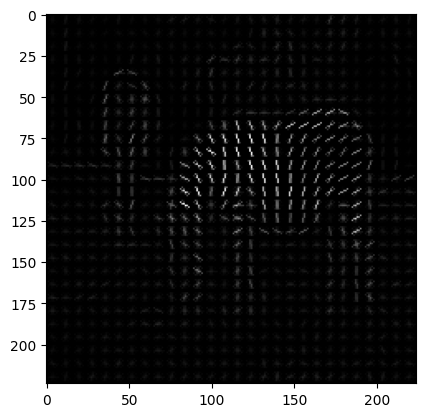

In [ ]:
def hogFunction(pathDir):
  set_stop = 1
  trainSet = []
  for img_name in os.listdir(pathDir):
      if (img_name.endswith(".jpg")):
          img_path = os.path.join(pathDir, img_name)
          img = np.array(mpimg.imread(img_path))
          image_resize = cv2.resize(img, (224, 224))
          lab = cv2.cvtColor(image_resize, cv2.COLOR_BGR2LAB)
          l_channel, a, b = cv2.split(lab)
          clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2,2))
          cl = clahe.apply(l_channel)
          limg = cv2.merge((cl,a,b))
          enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

          #feel free to use the resized image or the enhanced contrast image
          fd, himg = hog(enhanced_img, visualize = True, multichannel=True)
          plt.imshow(himg, cmap = 'gray')
          copy = cv2.imwrite(img_name, fd)
          trainSet.append(fd)
          set_stop = set_stop + 1
  return np.array(trainSet)

zebras = hogFunction('Animal_dir/animal_database/zebra/original')
zebras


Using 'zebras' as an example, we see the output of a 2D array (A list of 1D arrays describing an image), and a HOG graph to depict the gradients of the images.

##Feature 3: Edges
The second feature we decide to select for are the edges of a picture. This extractEdgesFunction transforms each image and only shows the outlines that the CV2 library identifies.

You can see the new images below.

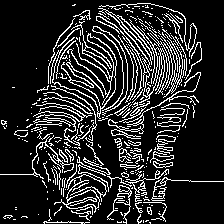

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
zebra_train_hsv = []
leopard_train_hsv = []
coyote_train_hsv = []

def extractEdgesFunction(pathDir):
  set_stop = 1
  trainSet = []
  flag =0
  for img_name in os.listdir(pathDir):
    if (img_name.endswith(".jpg")):
        img_path = os.path.join(pathDir, img_name)
        img = np.array(mpimg.imread(img_path))
        image_resize = cv2.resize(img, (224, 224))
        RGBimage = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)
        gray_scale = cv2.cvtColor(image_resize,cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(image_resize,224,224)
        trainSet.append(edges)

        if (flag == 0):
          cv2_imshow(edges)
          flag=1

        NPSet = np.array(trainSet)
        flattenedSet = NPSet.reshape(NPSet.shape[0], -1)
  return flattenedSet

extractEdgesFunction('Animal_dir/animal_database/zebra/original')
#extractEdgesFunction('Animal_dir/animal_database/leopard/original')
#extractEdgesFunction('Animal_dir/animal_database/coyote/original')

As you can see, all the images have been converted so that the outlines become the main feature.

##More data processing : resizing resolution
Next, we also decided to compute the avg dimensions of each image. The point of this function was for preprocessing purposes. Every image has to be resized to be the same resolution, as we will be using a 1D array dimensional space to compare images and classify them. In order to do that, the size of the dimensions must be the same in order to properly compare.

We choose a 224x224 resolution.

Zebra image Dimensions: 
Average Height: 281
Average Width: 342
Leopard image Dimensions: 
Average Height: 276
Average Width: 364
Coyote image Dimensions: 
Average Height: 294
Average Width: 346
Zebra Sample Image: 


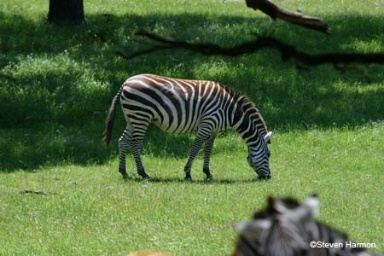

Coyote Sample Image: 


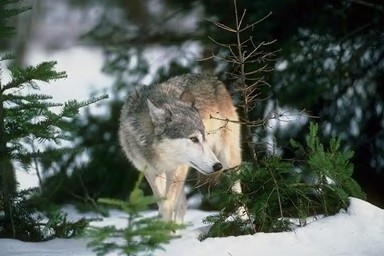

Leopard Sample Image: 


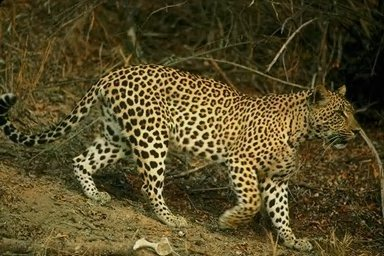

In [ ]:
def computeAvgDimensions(pathOfDir):
  widthOfImage = []
  heightOfImage = []
  for img_name in os.listdir(pathOfDir):
      if img_name.endswith(".jpg"):
          img_path = os.path.join(pathOfDir, img_name)
          im = Image.open(img_path)
          widthOfImage.append(im.size[0])
          heightOfImage.append(im.size[1])
  avgHeight = round(sum(heightOfImage)/len(heightOfImage))
  avgWidth = round(sum(widthOfImage)/len(widthOfImage))
  print(f"Average Height: {avgHeight}")
  print(f"Average Width: {avgWidth}")

print(f"Zebra image Dimensions: ")
computeAvgDimensions('Animal_dir/animal_database/zebra/original')
print(f"Leopard image Dimensions: ")
computeAvgDimensions('Animal_dir/animal_database/leopard/original')
print(f"Coyote image Dimensions: ")
computeAvgDimensions('Animal_dir/animal_database/coyote/original')

print(f"Zebra Sample Image: ")
imgCV = imread('Animal_dir/animal_database/zebra/original/10_52.jpg')
if imgCV is not None:
  cv2_imshow(imgCV)

print(f"Coyote Sample Image: ")
imgCV2 = imread('Animal_dir/animal_database/coyote/original/5943.jpg')
if imgCV2 is not None:
  cv2_imshow(imgCV2)


print(f"Leopard Sample Image: ")
imgCV3 = imread('Animal_dir/animal_database/leopard/original/4348.jpg')
if imgCV3 is not None:
  cv2_imshow(imgCV3)


We see the average resolutions of each category. We decide on 224 by 224.

#FEATURE SELECTION

Now that we have our features, we want to select some features to build our classification models. We decide to try out HOG, average RGB, edge outlined images, and RGB values. We will explain indepth as we come across each subject.

For now, we will focus on building our models.

We will first focus on our supervised learning models : KNN.


#K-Means Neighbor
##Model 1 : Using HOG


For our first model, we use HOG as it's main feature.

We first convert all of our images into our desired 2D array. We then label each image appropriately.

We then concatenate this all into an X_value and Y_value (features vs labels), and we split this training data.

<ipython-input-3-9f8ca5e49e76>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, himg = hog(enhanced_img, visualize = True, multichannel=True)


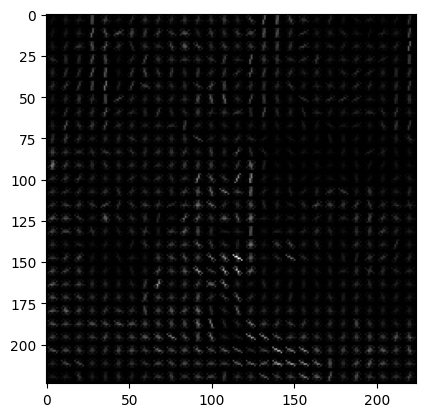

In [ ]:
hog_features = []
hog_zebra_features = []
hog_leopard_features = []
hog_coyote_features = []
class_labels = []

hog_zebra_features = hogFunction('Animal_dir/animal_database/zebra/original')
zebra_labels = ['zebra'] * len(hog_zebra_features)

hog_leopard_features = hogFunction('Animal_dir/animal_database/leopard/original')
leopard_labels = ['leopard'] * len(hog_leopard_features)

hog_coyote_features = hogFunction('Animal_dir/animal_database/coyote/original')  # Assuming you meant coyotes here
coyote_labels = ['coyote'] * len(hog_coyote_features)

hog_features = np.concatenate([hog_zebra_features, hog_leopard_features, hog_coyote_features])
class_labels = np.concatenate([zebra_labels,  leopard_labels, coyote_labels])


# Split the dataset into a training set and a test set
hog_X_train, hog_X_test, hog_y_train, hog_y_test = train_test_split(hog_features, class_labels, test_size=0.2, random_state = 42)

hogFunction() properly converts our images into data we can use, 2D arrays holding a 1D array per image using a homogenous size for all arrays, so that they are able to be compared and classified.

After splitting the data into training or testing sets, we are ready to build our KNN and K-means clustering models.


Using KNeighborsClassifier, we build a KNN model using our training data.

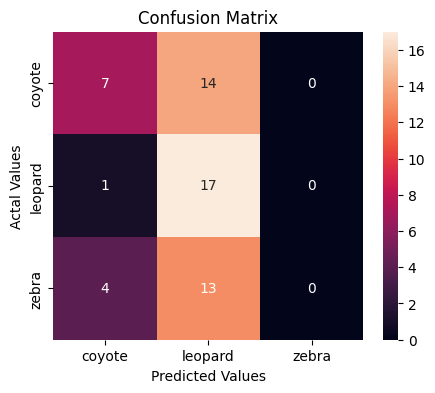

Classification report : 
               precision    recall  f1-score   support

       zebra       0.00      0.00      0.00        17
     leopard       0.39      0.94      0.55        18
      coyote       0.58      0.33      0.42        21

    accuracy                           0.43        56
   macro avg       0.32      0.43      0.32        56
weighted avg       0.34      0.43      0.34        56

Total accuracy
Accuracy: 0.42857142857142855


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


conf_mat = []
accuracies_arr = []
y_pred = np.zeros((len(hog_y_test), len(hog_y_test)))

hog_knn_dist = KNeighborsClassifier(n_neighbors=2)
hog_knn_dist.fit(hog_X_train, hog_y_train)

hog_y_pred = hog_knn_dist.predict(hog_X_test)


hog_cm = confusion_matrix(hog_y_test, hog_y_pred)
hog_cm_df = pd.DataFrame(hog_cm,
                     index = ['coyote','leopard','zebra'],
                     columns = ['coyote','leopard','zebra'])
plt.figure(figsize=(5,4))
sns.heatmap(hog_cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

matrix = classification_report(hog_y_test,hog_y_pred,labels=['zebra','leopard','coyote'])
print('Classification report : \n',matrix)

print("Total accuracy")
accuracy = accuracy_score(hog_y_test, hog_y_pred)
print("Accuracy:", accuracy)

According to our matrix, our model assumed that most images were of leopards.

Our total accuracy using this KNN model is 43%, which isn't practical, but is greater than a 1 in 3 random chance, 33%. In that way, our model is more accurate than a random number generator.

We see that using HOG as our feature, our model has trouble identifying any zebras. They can only differentiate between coyotes and leopards.



## Models 2 : AVERAGE RGB
In this section, we utilize the extractRGBFunction to extract the mean RGB value of an image.

This one is a little different, though. Instead of a 1D array representing our image, we are using one integer value : an average RGB value for all pixels of an image.

The reason why we are trying this out, although lower level, is because our three classifications : zebras, leopards, and coyotes, have distinct colors, and their natural habitats also are very distinct (white snow vs green pastures).

[]


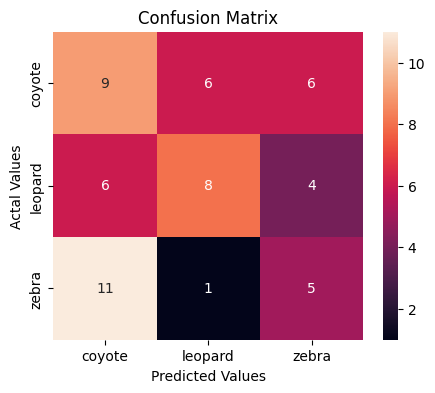

Confusion Matrix Results: 
               precision    recall  f1-score   support

       zebra       0.33      0.29      0.31        17
     leopard       0.53      0.44      0.48        18
      coyote       0.35      0.43      0.38        21

    accuracy                           0.39        56
   macro avg       0.40      0.39      0.39        56
weighted avg       0.40      0.39      0.39        56



In [ ]:

rgb_features = []
rgb_zebra_features = []
rgb_leopard_features = []
rgb_coyote_features = []

rgb_zebra_features = extractRGBFunction('Animal_dir/animal_database/zebra/original')
rgb_leopard_features = extractRGBFunction('Animal_dir/animal_database/leopard/original')
rgb_coyote_features = extractRGBFunction('Animal_dir/animal_database/coyote/original')

rgb_features = rgb_zebra_features + rgb_leopard_features + rgb_coyote_features
NPSet = np.array(rgb_features)
flattenSet = NPSet.reshape(NPSet.shape[0], -1)
rgb_X_train, rgb_X_test, rgb_y_train, rgb_y_test = train_test_split(flattenSet, class_labels, test_size=0.2, random_state = 42)

conf_mat_rgb = []
accuracies_arr_rgb = []
rgb_knn_dist = KNeighborsClassifier(n_neighbors=3)
rgb_knn_dist.fit(rgb_X_train, rgb_y_train)
rgb_y_pred = rgb_knn_dist.predict(rgb_X_test)


print(conf_mat_rgb)
rgb_cm = confusion_matrix(rgb_y_test, rgb_y_pred)
rgb_cm_df = pd.DataFrame(rgb_cm,
                     index = ['coyote','leopard','zebra'],
                     columns = ['coyote','leopard','zebra'])
plt.figure(figsize=(5,4))
sns.heatmap(rgb_cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

matrix = classification_report(rgb_y_test,rgb_y_pred,labels=['zebra','leopard','coyote'])
print('Confusion Matrix Results: \n',matrix)

##Model 3 : EDGES
In this section, we utilize the cv2 library's ability to extract the edges from an image as its main feature for our models.

Like usual, grab the edges feature for each image, and label them correspondingly.

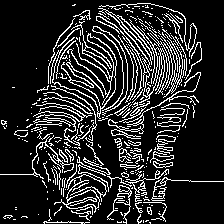

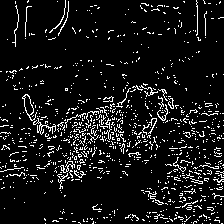

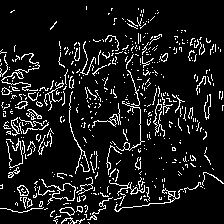

In [ ]:

edges_features = []


zebra_features_edges = extractEdgesFunction('Animal_dir/animal_database/zebra/original')
zebra_labels_edges = ['zebra'] * len(zebra_features_edges)

leopard_features_edges = extractEdgesFunction('Animal_dir/animal_database/leopard/original')
leopard_labels_edges= ['leopard'] * len(leopard_features_edges)


coyote_features_edges = extractEdgesFunction('Animal_dir/animal_database/coyote/original')
coyote_labels_edges = ['coyote'] * len(coyote_features_edges)

All the images have been converted into 1D arrays depicting the outlines of the images, focusing on patterns and shapes. As we see, zebra stripes are very pronounced, as well as the leopards.

Split the data into training and testing sets.

In [ ]:
edges_features = np.concatenate([zebra_features_edges, leopard_features_edges, coyote_features_edges])

#zebra_features
#y
#class_labels = zebra_labels +  leopard_labels + coyote_labels
class_labels_edges = np.concatenate([zebra_labels_edges, leopard_labels_edges, coyote_labels_edges])


# Split the dataset into a training set and a test set
X_train_edges, X_test_edges, y_train_edges, y_test_edges = train_test_split(edges_features, class_labels_edges, test_size=0.2, random_state = 42)

Build our KNN model with our training data.

In [ ]:

knn_edges = KNeighborsClassifier(n_neighbors=3)
knn_edges.fit(X_train_edges, y_train_edges)
#X_train


y_pred_edges = knn_edges.predict(X_test_edges)
accuracy_edges = accuracy_score(y_test_edges, y_pred_edges)
print("Accuracy:", accuracy_edges)


Accuracy: 0.375


As you can see, our accuracy using edges is not very good. This was not what we expected, because the animal outlines seem very distinct from one another with the human eye.

 It is no more significant than a random number generator. Why is this? We create a confusion matrix to see our model's accuracies and preferences.

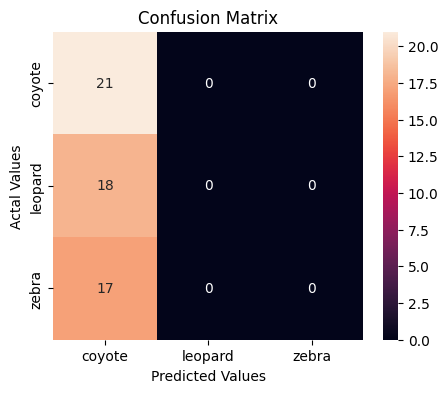

Classification report : 
               precision    recall  f1-score   support

       zebra       0.00      0.00      0.00        17
     leopard       0.00      0.00      0.00        18
      coyote       0.38      1.00      0.55        21

    accuracy                           0.38        56
   macro avg       0.12      0.33      0.18        56
weighted avg       0.14      0.38      0.20        56



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
edges_cm = confusion_matrix(y_test_edges, y_pred_edges)
edges_cm_df = pd.DataFrame(edges_cm,
                     index = ['coyote','leopard','zebra'],
                     columns = ['coyote','leopard','zebra'])
plt.figure(figsize=(5,4))
sns.heatmap(edges_cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

matrix = classification_report(y_test_edges,y_pred_edges,labels=['zebra','leopard','coyote'])
print('Classification report : \n',matrix)

As you can see, our model thinks EVERYTHING is a coyote.

We decided to keep this section because we initially banked our hopes onto edges, because zebras and leopards have very specific patterns that we thought would give this model an advantage.

However, the computer who flattens these images anyway compared each pixel as either white or black, and coyotes' images were mostly black, skewing our model.

This helps us realize that we cannot keep it binary, and we decide to try an RGB model, reflecting on our average RGB model and our failed edges model.

You will see this final RGB model near the end of the document.

## K-Means Clustering

In this section, we use the K-Means clustering algorithm using the hogFunction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


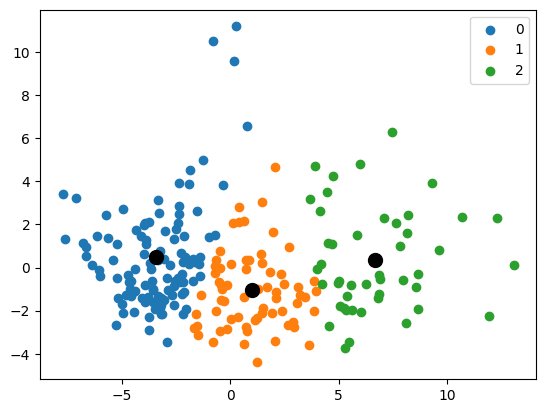

In [ ]:
#K-MEANS

#KMC
pca = PCA(2)
pca_hog_X_train = pca.fit_transform(hog_X_train)
hog_kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0)
hog_kmeans.fit(pca_hog_X_train)

cluster_labels = hog_kmeans.labels_

cluster_centroids = hog_kmeans.cluster_centers_
cluster_labels = hog_kmeans.labels_

label = hog_kmeans.fit_predict(pca_hog_X_train)

unique_labels = np.unique(cluster_labels)

for i in unique_labels:
    plt.scatter(pca_hog_X_train[label == i , 0], pca_hog_X_train[label == i , 1], label = i)
plt.scatter(cluster_centroids[:,0] , cluster_centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()


In [ ]:

silhouette_avg = silhouette_score(hog_X_train, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.020696293943144255


**K-Means Clustering Analysis: Histogram of Oriented Gradients**

In this graph, our average silhouette score was only 0.04 at best. The clusters for our HOG model appeared to be incredibly close to each other. This is likely due to gradients concentrations not having much variation between different classes of animals in our images.

In [ ]:
array_hog_features = np.array(hog_features)
pca = decomposition.PCA(n_components=0.9)
reduc_features = pca.fit_transform(array_hog_features)
new_kmeans = KMeans(n_clusters= 9, init = 'k-means++', random_state=0)
new_kmeans.fit(reduc_features)

df_results = pd.DataFrame(class_labels, columns=['labels'] )
df_results["Cluster_label"] = new_kmeans.labels_

for cluster in list(set(df_results.Cluster_label.unique())):
    ls_of_results = df_results[df_results['Cluster_label']==cluster]['labels']
    zebra=0
    leopard = 0
    coyote = 0
    for name in ls_of_results:
        if 'zebra' in name:
            zebra = zebra+1
        elif 'leopard' in name:
            leopard = leopard+1
        elif 'coyote' in name:
            coyote = coyote+1
    print("cluster: ",(cluster))
    print('zebra: ', zebra)
    print('coyote: ', coyote)
    print('leopard:', leopard)

df_results['class'] = np.where(
    df_results['labels'].str.contains("zebra"), "zebra",
    (np.where(df_results['labels'].str.contains("leopard"), "leopard",
    (np.where(df_results['labels'].str.contains("coyote"), "coyote", 'unknown')
    ))))

df_results['real_label'] = np.where(
    df_results['labels'].str.contains("zebra"), 0,
    (np.where(df_results['labels'].str.contains("leopard"), 1,
    (np.where(df_results['labels'].str.contains("coyote"), 2, -1)
    ))))
print("Overall accuracy of the K Means clustering algorithm: \n")
adjusted_rand_score(list(df_results.real_label), list(df_results.Cluster_label))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster:  0
zebra:  0
coyote:  1
leopard: 0
cluster:  1
zebra:  1
coyote:  1
leopard: 0
cluster:  2
zebra:  22
coyote:  25
leopard: 32
cluster:  3
zebra:  7
coyote:  30
leopard: 13
cluster:  4
zebra:  25
coyote:  7
leopard: 8
cluster:  5
zebra:  0
coyote:  0
leopard: 1
cluster:  6
zebra:  0
coyote:  1
leopard: 0
cluster:  7
zebra:  13
coyote:  7
leopard: 21
cluster:  8
zebra:  9
coyote:  28
leopard: 25
Overall accuracy of the K Means clustering algorithm: 



0.04113178148625973



In this section, we will use K-Means clustering on the HSV of an image.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


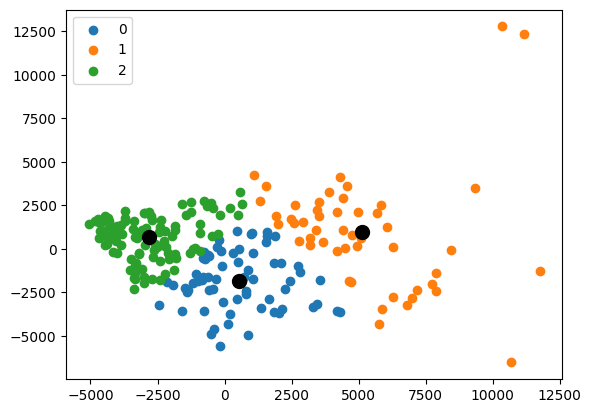

In [ ]:
#K-MEANS

#KMC
pca = PCA(2)
pca_edges_X_train = pca.fit_transform(X_train_edges)
edges_kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=0)
edges_kmeans.fit(pca_edges_X_train)

edges_cluster_labels = edges_kmeans.labels_

edges_cluster_centroids = edges_kmeans.cluster_centers_

label = edges_kmeans.fit_predict(pca_edges_X_train)

unique_labels = np.unique(edges_cluster_labels)

for i in unique_labels:
    plt.scatter(pca_edges_X_train[label == i , 0], pca_edges_X_train[label == i , 1], label = i)
plt.scatter(edges_cluster_centroids[:,0] , edges_cluster_centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()


In [ ]:
edges_silhouette_avg = silhouette_score(X_train_edges, edges_cluster_labels)
print("Silhouette Score:", edges_silhouette_avg)

Silhouette Score: 0.019960438658874913


**K-Means Clustering Analysis: Edges**

Looking at the K-means clustering for our model using edges, we have a low average silhouette score at 0.11. The data appears to be in one large cluster similar to the HOG model K-means clustering. This is because edges could be anywhere on an image and our model doesn’t try to isolate patterns of edges or what body part they indicate.

In [ ]:

array_edges_features = np.array(edges_features)
pca = decomposition.PCA(n_components=0.9)
trans_edges_features = pca.fit_transform(array_edges_features)
edges_kmeans = KMeans(n_clusters= 9, init = 'k-means++', random_state=0)
edges_kmeans.fit(trans_edges_features)

edges_df_results = pd.DataFrame(class_labels, columns=['labels'] )
edges_df_results["Cluster_label"] = edges_kmeans.labels_

for cluster in list(set(edges_df_results.Cluster_label.unique())):
    ls_of_results = edges_df_results[edges_df_results['Cluster_label']==cluster]['labels']
    zebra=0
    leopard = 0
    coyote = 0
    for name in ls_of_results:
        if 'zebra' in name:
            zebra = zebra+1
        elif 'leopard' in name:
            leopard = leopard+1
        elif 'coyote' in name:
            coyote = coyote+1
    print("cluster: ",(cluster))
    print('zebra: ', zebra)
    print('coyote: ', coyote)
    print('leopard:', leopard)
    print('\n')

edges_df_results['class'] = np.where(
    edges_df_results['labels'].str.contains("zebra"), "zebra",
    (np.where(edges_df_results['labels'].str.contains("leopard"), "leopard",
    (np.where(edges_df_results['labels'].str.contains("coyote"), "coyote", 'unknown')
    ))))

edges_df_results['real_label'] = np.where(
    edges_df_results['labels'].str.contains("zebra"), 0,
    (np.where(edges_df_results['labels'].str.contains("leopard"), 1,
    (np.where(edges_df_results['labels'].str.contains("coyote"), 2, -1)
    ))))
print("Overall accuracy of the K Means clustering algorithm: ")
adjusted_rand_score(list(edges_df_results.real_label), list(edges_df_results.Cluster_label))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster:  0
zebra:  41
coyote:  8
leopard: 22


cluster:  1
zebra:  1
coyote:  0
leopard: 0


cluster:  2
zebra:  0
coyote:  0
leopard: 1


cluster:  3
zebra:  32
coyote:  92
leopard: 75


cluster:  4
zebra:  1
coyote:  0
leopard: 0


cluster:  5
zebra:  0
coyote:  0
leopard: 1


cluster:  6
zebra:  0
coyote:  0
leopard: 1


cluster:  7
zebra:  1
coyote:  0
leopard: 0


cluster:  8
zebra:  1
coyote:  0
leopard: 0


Overall accuracy of the K Means clustering algorithm: 


0.10851950171324551

#Our final model : Using RGB Values as our Feature



Now that we have looked at edges and avg RGB as features, we want to see what happens if we base our models off of one feature : RGB values.

We create an extract_RGB_vals() function that grabs an image and extracts their RGB values for each pixel, and flattens that image into a 1D array.


In [ ]:
def extract_RGB_vals(pathDir):
  set_stop = 1
  trainSet = []
  flag = 0
  for img_name in os.listdir(pathDir):
    if (img_name.endswith(".jpg")):
        img_path = os.path.join(pathDir, img_name)
        img = np.array(mpimg.imread(img_path))
        image_resize = cv2.resize(img, (224, 224))

        RGBimage = cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)
        trainSet.append(RGBimage)

        if (flag == 0):
          cv2_imshow(RGBimage)
          flag=1
        #cv2_imshow(RGBimage)
        NPSet = np.array(trainSet)
        flattenedSet = NPSet.reshape(NPSet.shape[0], -1)
  return flattenedSet

Here, we extract each of our three classes: zebra images, leopard images, and coyote images.

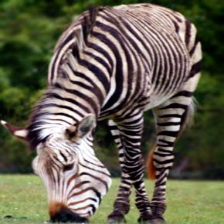

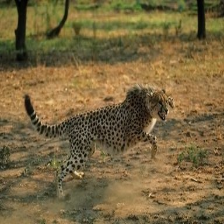

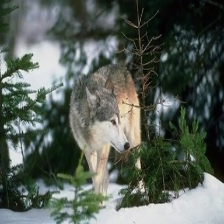

In [ ]:
rgb_features = []


zebra_features_rgb =extract_RGB_vals('Animal_dir/animal_database/zebra/original')
zebra_labels_rgb = ['zebra'] * len(zebra_features_rgb)

leopard_features_rgb = extract_RGB_vals('Animal_dir/animal_database/leopard/original')
leopard_labels_rgb = ['leopard'] * len(leopard_features_rgb)


coyote_features_rgb = extract_RGB_vals('Animal_dir/animal_database/coyote/original')
coyote_labels_rgb = ['coyote'] * len(coyote_features_rgb)

In [ ]:
rgb_features = np.concatenate([zebra_features_rgb, leopard_features_rgb, coyote_features_rgb])
#hog_features = zebra_features + leopard_features + coyote_features

#zebra_features
#y
#class_labels = zebra_labels +  leopard_labels + coyote_labels
class_labels_rgb = np.concatenate([zebra_labels_rgb, leopard_labels_rgb, coyote_labels_rgb])


# Split the dataset into a training set and a test set
X_train_rgb, X_test_rgb, y_train_rgb, y_test_rgb = train_test_split(rgb_features, class_labels_rgb, test_size=0.2, random_state = 42)

We grab the RGB 1D arrays for each image, and compile them into rgb_features.

With the labels, we split the data into training and testing.

a 224x224 image turns into 224x224x3(RGB) = 150528 dimensions.

In [ ]:
len(X_train_rgb[0])

150528

Now, we build a KNN model, and see our results.

In [ ]:

knn_rgb = KNeighborsClassifier(n_neighbors=3)
knn_rgb.fit(X_train_rgb, y_train_rgb)
#X_train
from sklearn.metrics import accuracy_score


y_pred_rgb = knn_rgb.predict(X_test_rgb)
#print(y_test_rgb)
#print(y_pred_rgb)
accuracy_rgb = accuracy_score(y_test_rgb, y_pred_rgb)
print("Accuracy:", accuracy_rgb)

zebra_indices = np.where(y_test_rgb == 'zebra')[0]
#print(zebra_indices)
zebra_predictions = y_pred_rgb[zebra_indices]
#print(zebra_predictions)
zebra_labels = y_test_rgb[zebra_indices]
#print(zebra_labels)
# Calculate accuracy for zebra images
zebra_accuracy = accuracy_score(zebra_labels, zebra_predictions)
print("Accuracy for Zebra Images:", zebra_accuracy)


Accuracy: 0.625
Accuracy for Zebra Images: 0.5294117647058824


As you see, our accuracy for this model is .625, which is significantly higher than an RNG model's .33.

This is most likely due to the contrasting colors in both animals and habitat backgrounds.

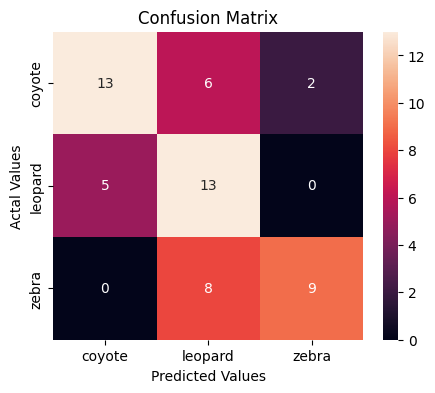

Classification report : 
               precision    recall  f1-score   support

       zebra       0.82      0.53      0.64        17
     leopard       0.48      0.72      0.58        18
      coyote       0.72      0.62      0.67        21

    accuracy                           0.62        56
   macro avg       0.67      0.62      0.63        56
weighted avg       0.67      0.62      0.63        56



In [ ]:
new_rgb_cm = confusion_matrix(y_test_rgb, y_pred_rgb)
new_rgb_cm_df = pd.DataFrame(new_rgb_cm,
                     index = ['coyote','leopard','zebra'],
                     columns = ['coyote','leopard','zebra'])
plt.figure(figsize=(5,4))
sns.heatmap(new_rgb_cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

matrix = classification_report(y_test_rgb,y_pred_rgb,labels=['zebra','leopard','coyote'])
print('Classification report : \n',matrix)

We see that this model is accurate in their respective categories. The model does not overdecide on a particular class like our edges model.

Next, we evaluate using a K-Means clustering model.

To find an optimal K, we try the elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

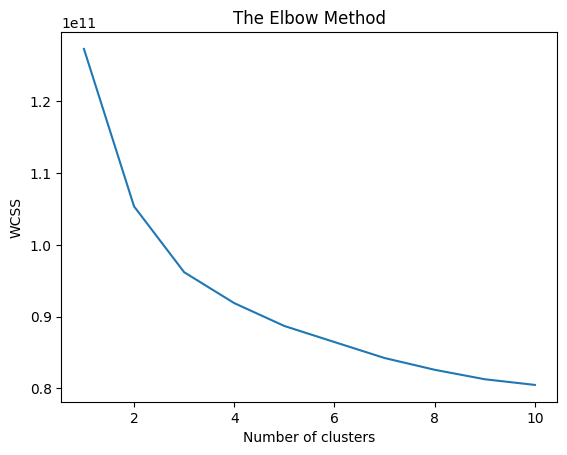

In [ ]:
#elbow

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                random_state = 42)
    kmeans.fit(X_train_rgb)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We find an elbow at k=3.  So that will be our k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.17106554352670503


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


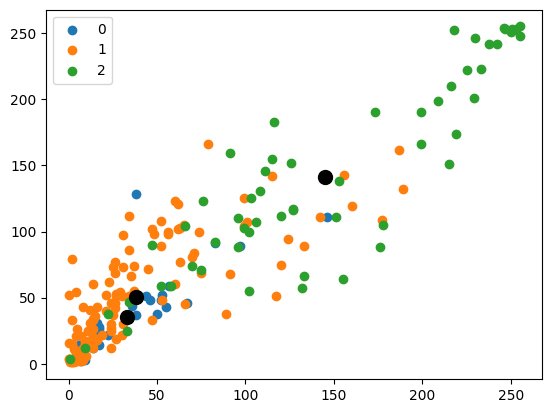

In [ ]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_rgb)

cluster_labels = kmeans.labels_

cluster_centroids = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
cluster_labels

cluster_pred_rgb = kmeans.predict(X_test_rgb)

#print(cluster_pred_rgb)
#print(y_test_rgb)


from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train_rgb, cluster_labels)
print("Silhouette Score:", silhouette_avg)

cluster_labels = kmeans.labels_

cluster_centroids = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

label = kmeans.fit_predict(X_train_rgb)

unique_labels = np.unique(cluster_labels)

for i in unique_labels:
    plt.scatter(X_train_rgb[label == i , 0], X_train_rgb[label == i , 1], label = i)
plt.scatter(cluster_centroids[:,0] , cluster_centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()


**K-Means Clustering Analysis: RGB Intensity**

Looking at the K-means clustering for the intensity of RGB values, our average silhouette score is again very low, indicating the data points are very close to the decision boundaries between clusters. In this graph, they are overlapping. This is to be expected as the RGB pixels in a single image are heavily varied if the animal we are trying to classify is colorful or the background contrasts the animal. This data seems to have a lot of darker colors, as much of the data is located near the origin. We notice a small cluster near the top right, indicating a high intensity of white, which could indicate a zebra. If the pictures were cropped to just have the animal itself with a blank background, then this would probably provide a more accurate clustering.

#CONCLUSION

For our project, we used multiple features and predictors in order to classify images of animals.

We initially assumed that HOG or edge extraction would help classify animals. However, we find that to not be the case.

The RGB intensity values model turned out to be the most accurate at 0.625 accuracy. This is significantly higher than a random number generator guessing a one in three chance.

The edges model turned out worse than we thought, because to the human eye, the outlines were very distinguishable.

The issue was most likely that the images were binary. Outline is 1, and the rest is 0. This made it so that most of the values were at 0, or black.

Our coyote dataset were filled with black images, so the model began to think that every image was a coyote despite the many white outlines of a zebra pattern.



This may be true for multiple reasons. The biggest reason may be that the habitats of the animals were very different in terms of RGB values. It was very easy for the computer to guess coyotes due to their extremely white snow backgrounds, for example.

KNN models turned out to be better than the K-means clustering. This is due to the fact that unsupervised learning techniques are not optimal for already labeled datasets. This is more for the jobs of supervised learning techniques, such as KNN or neural networks.

Although many of our hypotheses were null, we found success with the RGB intensity model KNN.

In [ ]:
#for converting to PDF
#!pip install nbconvert
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!jupyter nbconvert /CS105FinalProject.ipynb --to pdf

[NbConvertApp] Converting notebook /CS105FinalProject.ipynb to pdf
[NbConvertApp] Support files will be in CS105FinalProject_files/
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_files
[NbConvertApp] Making directory ./CS105FinalProject_file